In [0]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [0]:
path ="https://raw.githubusercontent.com/JedhaBootcamp/FULL_STACK_12_WEEK_PROGRAM/master/S0.3%20--%20Machine%20Learning%20Supervis%C3%A9/Projet%20--%20CONVERSION%20RATE/conversion_data.csv?token=AMEQSCLJ5QU6PDWMGBOWLZS5HCJGU"

In [0]:
dataset = pd.read_csv(path)

In [4]:
dataset.head()

country  age  new_user source  total_pages_visited  converted
0      UK   25         1    Ads                    1          0
1      US   23         1    Seo                    5          0
2      US   28         1    Seo                    4          0
3   China   39         1    Seo                    5          0
4      US   30         1    Seo                    6          0

In [5]:
len(dataset)

316200

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [7]:
dataset.describe(include="all")

country            age  ...  total_pages_visited      converted
count   316200  316200.000000  ...        316200.000000  316200.000000
unique       4            NaN  ...                  NaN            NaN
top         US            NaN  ...                  NaN            NaN
freq    178092            NaN  ...                  NaN            NaN
mean       NaN      30.569858  ...             4.872966       0.032258
std        NaN       8.271802  ...             3.341104       0.176685
min        NaN      17.000000  ...             1.000000       0.000000
25%        NaN      24.000000  ...             2.000000       0.000000
50%        NaN      30.000000  ...             4.000000       0.000000
75%        NaN      36.000000  ...             7.000000       0.000000
max        NaN     123.000000  ...            29.000000       1.000000

[11 rows x 6 columns]

==> Remarque :

_  Une valeur atypique (ou plus) dans la variable âge (max âge = 123 ans)

_ Deux tiers : (2/3) des individus son des new_users ( 68%)

 _  une valeur abbérante (ou plus) sur le nombre de pages visitées ( 7 pages 3ème quartile, et 29 pour le dernier)

In [8]:
dataset.isnull().sum()/len(dataset) # Pas de valeurs manquantes 

country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64

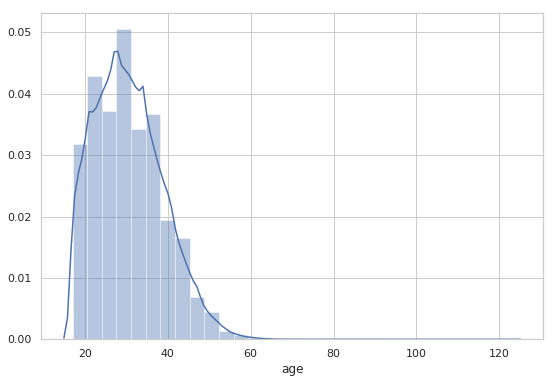

In [9]:
g = sns.set(style="whitegrid")
g, ax= plt.subplots(1, figsize=(9,6))
sns.distplot(dataset.age, bins=30, kde=True, ax=ax)

==> la majorité qont des jeunes, et comme on a vu sur le discrive : 75% des individus du dataset ont Moins de 36 ans 

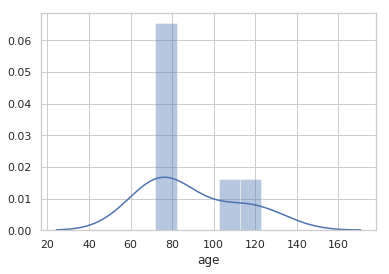

In [10]:
sns.distplot(dataset[dataset["age"] > 70].age, bins=5 )

==> On a mis un masque sur place pour afficher les valeurs abbérantes mentionnées plus haut.

La suppression de ces valeur ne fera pas de mal à notre analyse


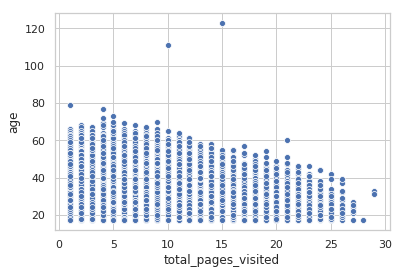

In [11]:
sns.scatterplot(x= "total_pages_visited", y= "age", data= dataset)

==> Le nombre de pages visitées dépend de l'âge :
Plus le nombre de pages visitées est éllevé plus la personne est jeune

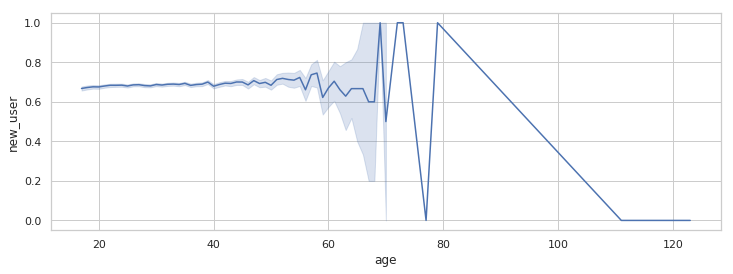

In [12]:
g = sns.set(style="whitegrid")
f, ax= plt.subplots(1, figsize=(12,4))
sns.relplot(x="age", y="new_user", data=dataset , kind="line", ax=ax)
plt.close()

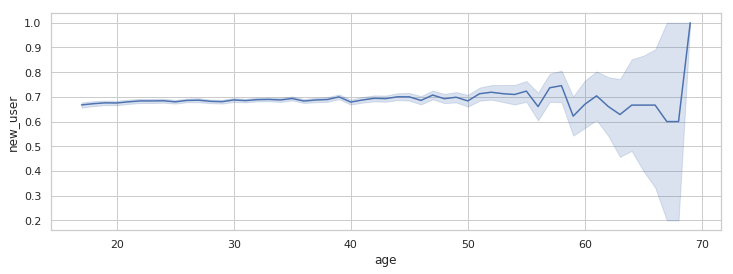

In [13]:
g = sns.set(style="whitegrid")
f, ax= plt.subplots(1, figsize=(12,4))
sns.relplot(x="age", y="new_user", data=dataset[dataset["age"] < 70], kind="line", ax=ax)
plt.close()

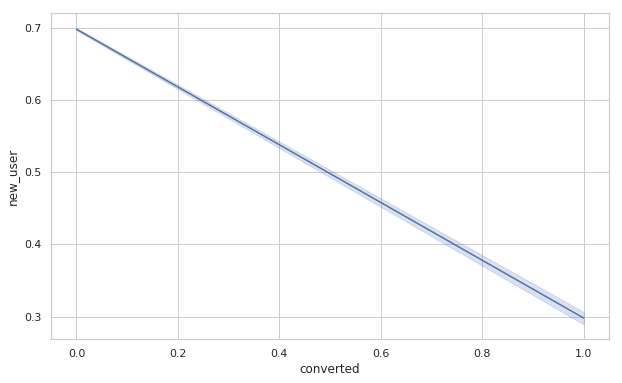

In [14]:

g = sns.set(style="whitegrid")
f, ax= plt.subplots( figsize=(10,6))
sns.relplot(x="converted", y="new_user", data=dataset, kind="line", ax=ax)
plt.close()

In [0]:
# On va supprimer les valeurs abbérantes de notre variable âge

dataset = dataset[dataset["age"]<70]

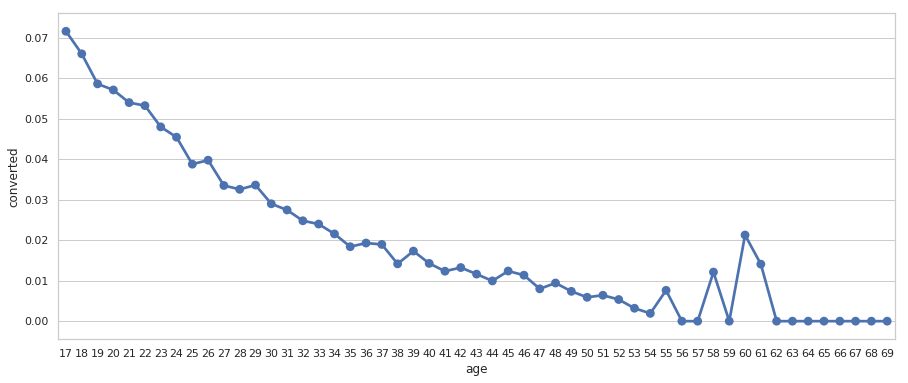

In [16]:
g = sns.set(style="whitegrid")
g, ax= plt.subplots(1, figsize=(15,6))
sns.pointplot(x="age", y="converted", data=dataset, ci=None, logistic=True)

==> Le graphique en haut confire le postulat suivant :

Plus l'âge augmente plus le taux de conversion diminue.


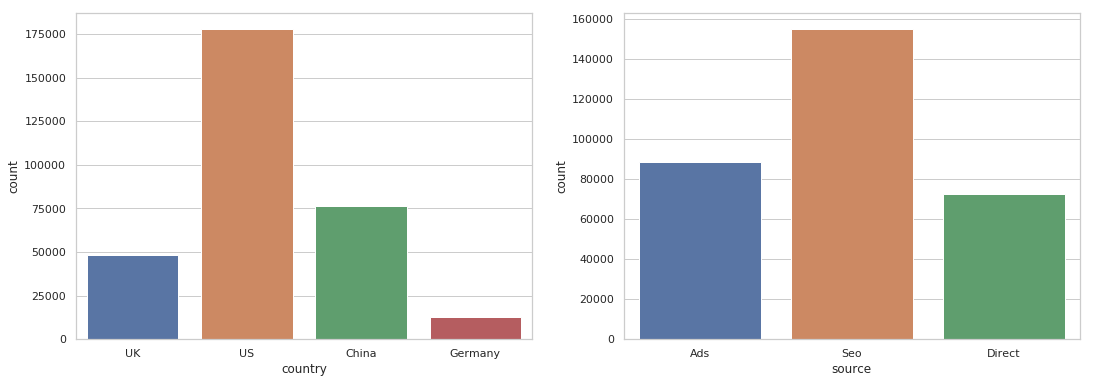

In [17]:
f, ax = plt.subplots(1,2, figsize=(18,6))
sns.countplot(dataset.country, ax = ax[0])
sns.countplot(dataset.source, ax = ax[1])


==> Les US son très représenté dans le dataset par rapport aux autres pays

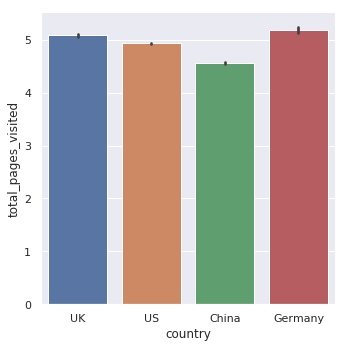

In [18]:
sns.set(style="darkgrid")
sns.catplot(x="country", y="total_pages_visited", data=dataset, kind="bar")

==> le nombre de pages visitées est presque pareil pour tous les pays.
####Important :
_ Malgré la représentation faible des allemands par rapport aux US dans le dataset, se sont eux qui visitent plus de pages.

_ Les chinois visitent moins de pages malgré leur representation (2ème place) dans le dataset. Cela peut être dû aux contraintes de la langue ou les interdictions de certains sites sur leur territoie.  

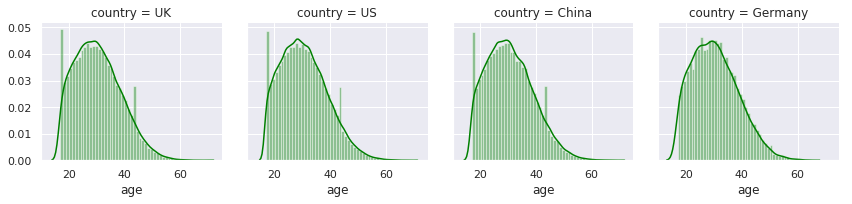

In [19]:
dist_age = sns.FacetGrid(data = dataset, col = "country")
dist_age.map(sns.distplot, "age",  color="green")

==> Une distribution quasi-identique pour les 4 pays 

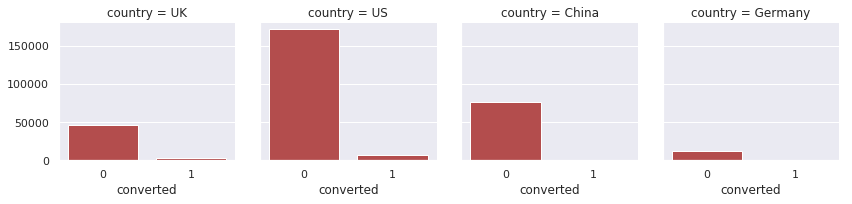

In [20]:
convert = sns.FacetGrid(data = dataset, col = "country")
convert.map(sns.countplot,"converted",  color="red", saturation=0.4)

==> Rien à signaler

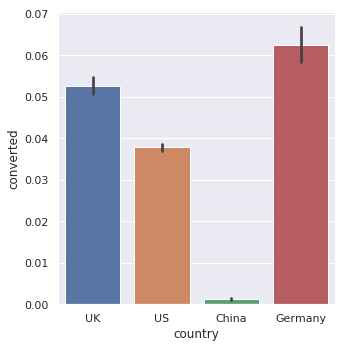

In [21]:
sns.set(style="darkgrid")
sns.catplot(x="country", y="converted", data=dataset, kind="bar")

==> Malgré que l'allemangne est la moins représenté dans le dataset, elle reste le pats avec le plus grand taux de conversion 

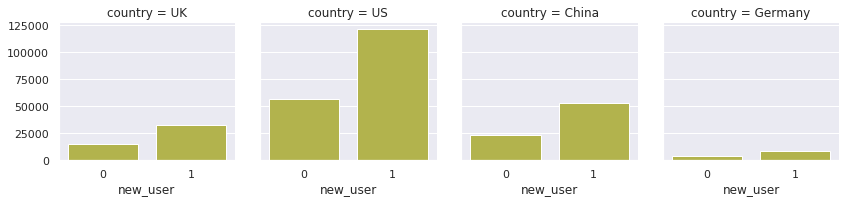

In [22]:
user = sns.FacetGrid(data = dataset, col = "country")
user.map(sns.countplot, "new_user", color="yellow", saturation=0.4)

### On va voir maintenant la même analyse mais sur (converted = 1) seulement pour voir ce que ça donne

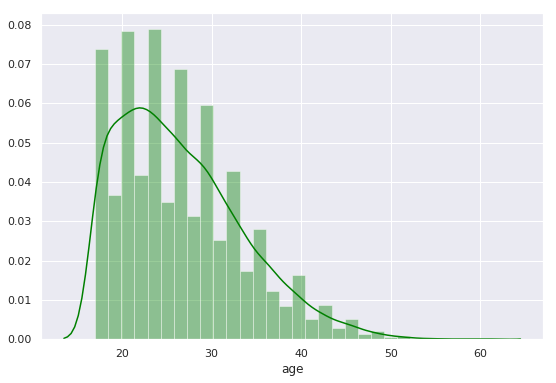

In [23]:
# On va supprimer les valeurs abbérantes de notre variable âge

#dataset = dataset[dataset["age"]<70]

g, ax= plt.subplots(1, figsize=(9,6))
sns.distplot(dataset[dataset["converted"]== 1]["age"], bins=30, kde=True, color='green', ax=ax)

==> Le grphique si contre, confirme notre idée précédemment dite. Les jeunes se convertissent plus que les gens plus âgés 

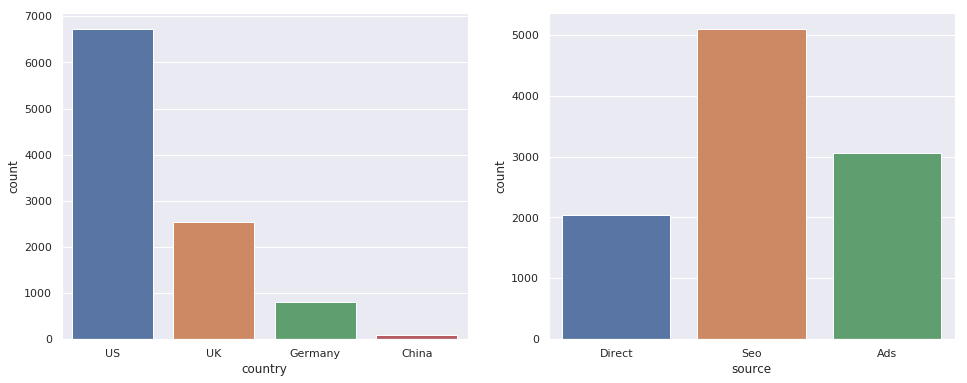

In [24]:
f, ax = plt.subplots(1,2, figsize=(16,6))
sns.countplot(x="country", data=dataset[dataset["converted"]== 1], ax=ax[0])
sns.countplot(x="source", data=dataset[dataset["converted"]== 1], ax=ax[1])

In [25]:
country_conversion_rate = (dataset.converted.groupby(dataset.country).sum() / dataset.converted.groupby(dataset.country).count()).reset_index()
country_conversion_rate.head(10)

country  converted
0    China   0.001332
1  Germany   0.062428
2       UK   0.052613
3       US   0.037802

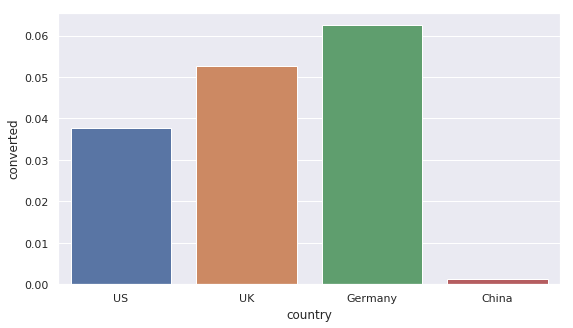

In [26]:
f, ax = plt.subplots(figsize = (9,5))
sns.barplot(country_conversion_rate.country.sort_values(ascending=False), y= country_conversion_rate.converted, ax=ax)


==> L'allemagne et le UK ont les taux de conversion les plus eleves a respectivement 6% et 5% alors que ce sont deux pays avec le plus faible nombre de visiteurs.



In [27]:
age_conversion_rate = (dataset.converted.groupby(dataset.age).sum() / dataset.converted.groupby(dataset.age).count()).reset_index()
age_conversion_rate.head(10)

age  converted
0   17   0.071607
1   18   0.066029
2   19   0.058616
3   20   0.057109
4   21   0.053985
5   22   0.053243
6   23   0.047990
7   24   0.045448
8   25   0.038782
9   26   0.039767

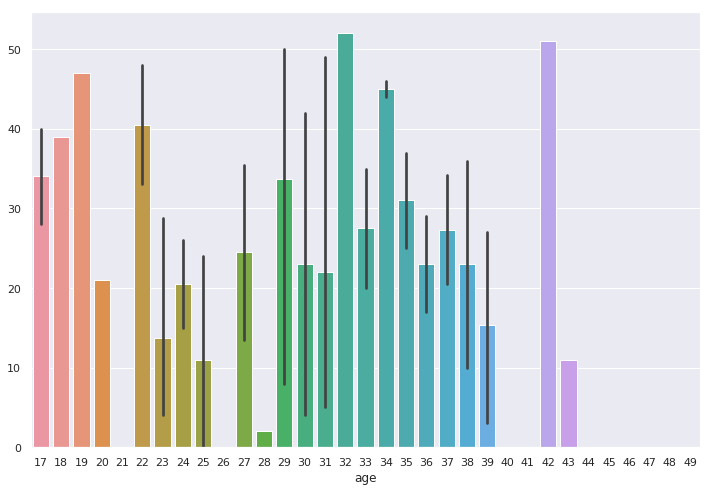

In [31]:
f, ax = plt.subplots(figsize = (12,8))
sns.barplot(x="age" , y= age_conversion_rate.index, data=dataset[dataset["age"] <50], ax=ax)  

==> # il est préférable de faire des tranches d'âges pour mieux visualiser le taux de conversion en fonction de l'âge

###Passons à la modélisation de notre modèle de pré**diction**

country et source sont des variables qualitatives ==> transformer en variables quantitatives

In [36]:
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()

age  new_user  total_pages_visited  ...  source_Ads  source_Direct  source_Seo
0   25         1                    1  ...           1              0           0
1   23         1                    5  ...           0              0           1
2   28         1                    4  ...           0              0           1
3   39         1                    5  ...           0              0           1
4   30         1                    6  ...           0              0           1

[5 rows x 11 columns]

In [0]:
X = dataset.loc[:, dataset.columns != 'converted']
y = dataset["converted"]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify = y, random_state=0 )

In [0]:
# on normalise les variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train, X_test = sc_X.fit_transform(X_train) , sc_X.transform(X_test)

#### Modèle de Regression

In [44]:
from sklearn.linear_model import LogisticRegression
LogisReg = LogisticRegression()
LogisReg.fit(X_train, y_train)
print(LogisReg.score(X_test, y_test))
print(LogisReg.score(X_test, y_test))

0.9864745198085559
0.9864745198085559


==> Notre modèle n'est pas trop entrainé ( Absence d'overfitting)

#### Matrice de confusion 

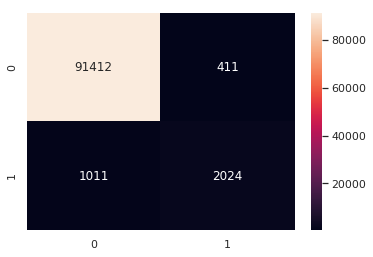

In [166]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, LogisReg.predict(X_train))
sns.heatmap(cm, annot=True, fmt="d")

#### Modèle d'Arbres de Décision

In [0]:
# Indice GINI

from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini', class_weight=None, random_state=42)
clf = clf.fit(X_train, y_train)

In [164]:
score = clf.score(X_test, y_test)
score

0.985009171603871

In [165]:
score = clf.score(X_train, y_train)
score

0.9854382968725998

In [68]:
pip install graphviz

In [69]:
import graphviz
arbre = tree.export_graphviz(clf,node_ids="box") 
graph = graphviz.Source(arbre)
graph

In [48]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(  n_estimators=50,     
                               max_depth=4,         
                               random_state=42,     
                               min_samples_leaf= 10)
RFC.fit(X_train, y_train)

print(RFC.score(X_test, y_test))
print(RFC.score(X_test, y_test))

0.984861582576061
0.984861582576061


==> On a obtenu un score légerement moins boon qu'avec la regression logistique. Cependant on va essayer d'optimiser notre randomforest avec un GridSearchCV

In [49]:
from sklearn.model_selection import GridSearchCV

rtc = RandomForestClassifier(random_state = 42)
params = {"n_estimators" : np.arange(10,100,20),
          'max_depth' : np.arange(3,6),
          'min_samples_leaf' : np.arange(5,20,5)
         }
grid =  GridSearchCV(estimator=rtc, param_grid= params, cv = 10, n_jobs =-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'m

In [50]:
grid.best_params_    

{'max_depth': 5, 'min_samples_leaf': 15, 'n_estimators': 90}

In [51]:
grid.best_estimator_  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [54]:
grid.best_estimator_.score(X_test, y_test)

0.985220013072171

In [53]:
grid.best_estimator_.score(X_train, y_train)

0.9854834774594052

In [61]:
best_params = grid.best_estimator_.get_params()
best_params

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 15,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 90,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [63]:
from sklearn.tree import DecisionTreeClassifier
best_arbre = DecisionTreeClassifier(max_depth=best_params["max_depth"],
                                         min_samples_leaf = best_params["min_samples_leaf"]                                 
                                         )
best_arbre.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [64]:
 best_arbre.score(X_test, y_test)

0.985061881970946

In [55]:
pip install graphviz

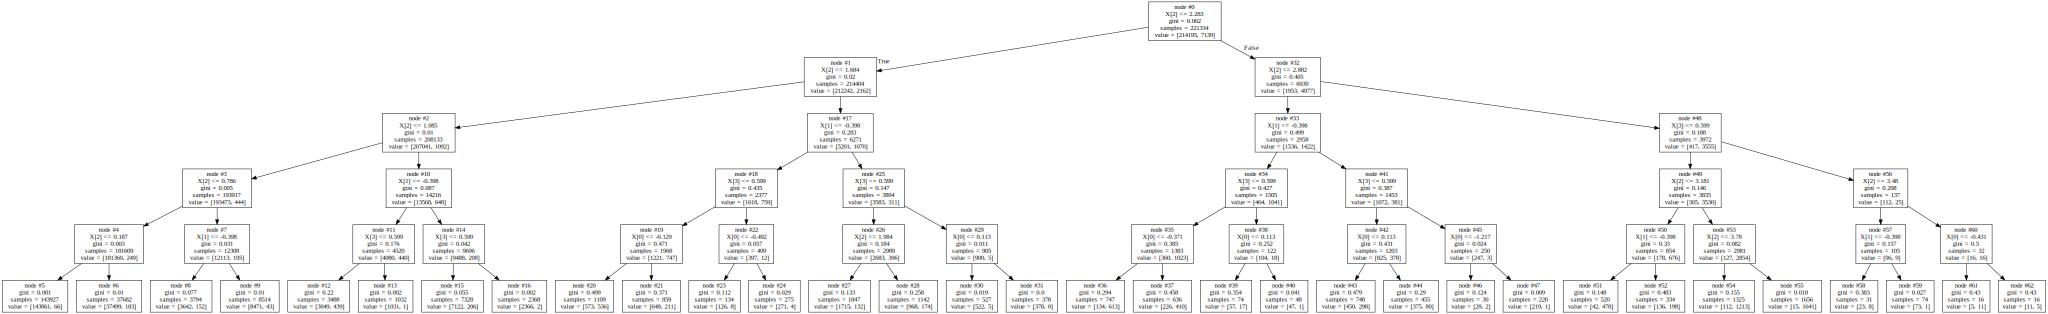

In [66]:
import graphviz
arbre_2 = tree.export_graphviz(best_arbre,node_ids="box") 
graph = graphviz.Source(arbre_2)
graph